In [1]:
import sys
sys.path.append("../../")

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.datasets import load_bikeshare
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

from ml.model.metrics import Metrics
from ml.visualization.visualization import Visualization

/home/barbara/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Dataset - Boston House Prices

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

In [3]:
data = load_boston()

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

In [5]:
X = df.drop(columns="target")
y = df["target"]

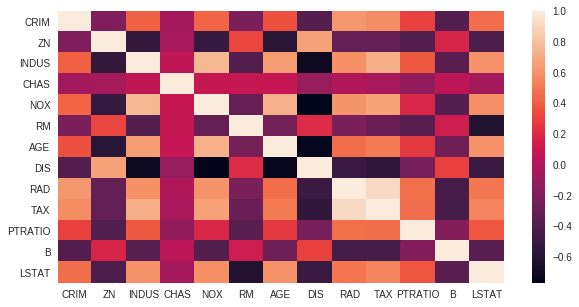

In [6]:
fig, ax = plt.subplots(figsize=(10,5))  
corr = X.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)

# Split train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model

In [8]:
model = LinearRegression()

In [9]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = model.predict(X_test)

## Metricas

In [11]:
Metrics.regression(y_test, y_pred)

{'mean_absolute_error': 3.1482558,
 'root_mean_squared_error': 4.5523646,
 'r2': 0.7261571,
 'smape': 8.3832455,
 'mape': 15.1437006}

# Evaluate

## Gráfico Predito x Real

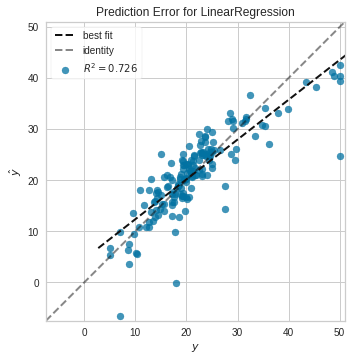

In [12]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()  

## Gráfico de Residuos

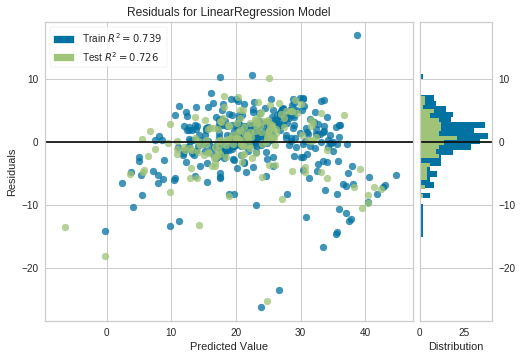

In [13]:
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()  

## Gráficos da Hermione

In [14]:
Visualization.regression_analysis(y_test, y_pred)

Histogram


NameError: name 'cls' is not defined